In [45]:
!pip install pandas-datareader
import pandas_datareader as pdt
import pandas as pd 
import numpy as np

# DATA/ EXPLORATORY DATA ANALYSIS

In [46]:
import matplotlib.pyplot as plt

In [47]:
pdt.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [48]:
start = "2000-01-01" 

In [49]:
ff = pdt.famafrench.FamaFrenchReader("F-F_Research_Data_Factors",freq = "M",start = start).read()

In [50]:
ff

{0:          Mkt-RF    SMB   HML    RF
 Date                              
 2000-01   -4.74   5.79 -1.91  0.41
 2000-02    2.45  21.42 -9.70  0.43
 2000-03    5.20 -17.23  8.17  0.47
 2000-04   -6.40  -6.68  7.26  0.46
 2000-05   -4.42  -6.09  4.81  0.50
 ...         ...    ...   ...   ...
 2022-10    7.83   0.09  8.05  0.23
 2022-11    4.60  -3.40  1.38  0.29
 2022-12   -6.41  -0.68  1.32  0.33
 2023-01    6.65   5.02 -4.05  0.35
 2023-02   -2.58   1.10 -0.80  0.34
 
 [278 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2000  -17.60  -4.60  44.99  5.89
 2001  -15.21  18.13  18.54  3.83
 2002  -22.76   4.40   8.16  1.65
 2003   30.75  26.78   4.97  1.02
 2004   10.72   4.45   7.63  1.20
 2005    3.09  -2.36   9.41  2.98
 2006   10.60   0.09  11.92  4.80
 2007    1.04  -7.36 -17.28  4.66
 2008  -38.34   2.44   1.00  1.60
 2009   28.26   9.18  -9.65  0.10
 2010   17.37  14.19  -5.22  0.12
 2011    0.44  -5.71  -8.42  0.04
 2012   16.27  -1.40  1

In [51]:
ff_df = ff[0]

In [52]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01,-4.74,5.79,-1.91,0.41
2000-02,2.45,21.42,-9.70,0.43
2000-03,5.20,-17.23,8.17,0.47
2000-04,-6.40,-6.68,7.26,0.46
2000-05,-4.42,-6.09,4.81,0.50
...,...,...,...,...
2022-10,7.83,0.09,8.05,0.23
2022-11,4.60,-3.40,1.38,0.29
2022-12,-6.41,-0.68,1.32,0.33


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

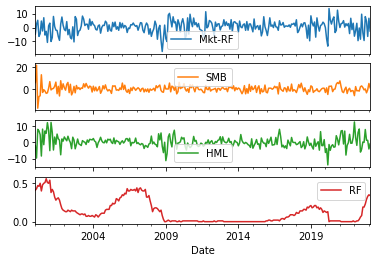

In [53]:
ff_df.plot(subplots=True)

Smooth plots, below what you see is the plotting of the 4 factos from the fama french model 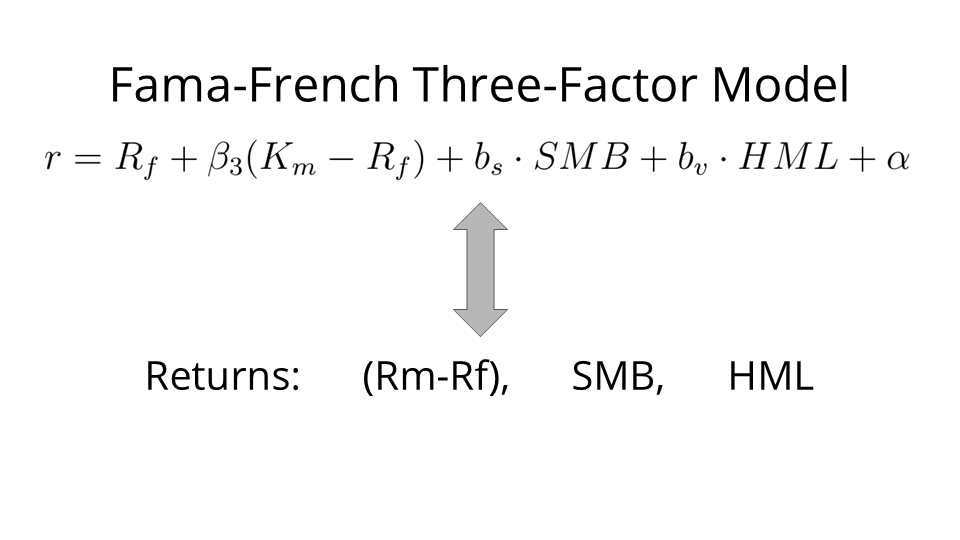

SMB is the excess return over small companies over big companies
HML is the historical excess return of Value stocks over Growth stocks

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

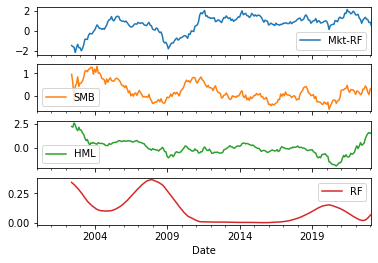

In [54]:
ff_df.rolling(30).mean().plot(subplots=True)

The momentum factor is the average return of past winners (across small and big), firms with higher cumulative return from t-12 to t-2, minus the average return of past losers (across small and big).

In [55]:
ff_M = pdt.famafrench.FamaFrenchReader("F-F_Momentum_Factor",freq = "M",start = start).read()[0]

In [56]:
ff_M

,Mom
Date,
2000-01,1.92
2000-02,18.20
2000-03,-6.83
2000-04,-8.39
2000-05,-8.98
...,...
2022-10,3.87
2022-11,-2.01
2022-12,4.52


<AxesSubplot:xlabel='Date'>

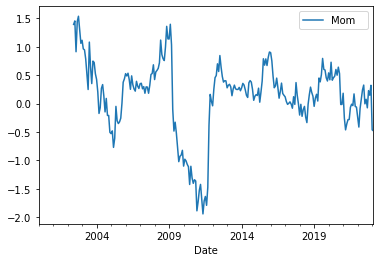

In [57]:
ff_M.rolling(30).mean().plot()

In [58]:
ff_M_df_merge = pd.merge(ff_df,ff_M,how ="inner",on ="Date" ,sort = True,copy = True,indicator = False)

In [59]:
ff_M_df_merge

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2000-01,-4.74,5.79,-1.91,0.41,1.92
2000-02,2.45,21.42,-9.70,0.43,18.20
2000-03,5.20,-17.23,8.17,0.47,-6.83
2000-04,-6.40,-6.68,7.26,0.46,-8.39
2000-05,-4.42,-6.09,4.81,0.50,-8.98
...,...,...,...,...,...
2022-10,7.83,0.09,8.05,0.23,3.87
2022-11,4.60,-3.40,1.38,0.29,-2.01
2022-12,-6.41,-0.68,1.32,0.33,4.52


In [60]:
!pip install yfinance
import yfinance as yf


In [61]:
yf.pdr_override()

In [62]:
GOOGdf = pdt.data.get_data_yahoo("GOOG",start = start)["Adj Close"].resample("M").ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [63]:
GOOGdf = GOOGdf.to_frame()

In [64]:
GOOGdf

,Adj Close
Date,
2004-08-31,NaN
2004-09-30,0.265996
2004-10-31,0.470988
2004-11-30,-0.045426
2004-12-31,0.059402
...,...
2022-12-31,-0.125382
2023-01-31,0.125549
2023-02-28,-0.095825


In [65]:
# To merge the upper GOOGdf and the famafrench risk factors we have to make a common column

Checking the exposure of returns with respect to returns of a particular stock

In [66]:
GOOGdf["temp"] = GOOGdf.index.astype("str")
GOOGdf["date time"] = pd.to_datetime(GOOGdf["temp"]).dt.strftime("%Y-%m")
GOOGdf.drop("temp",axis="columns")

,Adj Close,date time
Date,,
2004-08-31,NaN,2004-08
2004-09-30,0.265996,2004-09
2004-10-31,0.470988,2004-10
2004-11-30,-0.045426,2004-11
2004-12-31,0.059402,2004-12
...,...,...
2022-12-31,-0.125382,2022-12
2023-01-31,0.125549,2023-01
2023-02-28,-0.095825,2023-02


In [67]:

ff_M_df_merge["temp"] = ff_M_df_merge.index.astype("str")
ff_M_df_merge["date time"] = pd.to_datetime(ff_M_df_merge["temp"]).dt.strftime("%Y-%m")
ff_M_df_merge.drop("temp",axis="columns")

,Mkt-RF,SMB,HML,RF,Mom,date time
Date,,,,,,
2000-01,-4.74,5.79,-1.91,0.41,1.92,2000-01
2000-02,2.45,21.42,-9.70,0.43,18.20,2000-02
2000-03,5.20,-17.23,8.17,0.47,-6.83,2000-03
2000-04,-6.40,-6.68,7.26,0.46,-8.39,2000-04
2000-05,-4.42,-6.09,4.81,0.50,-8.98,2000-05
...,...,...,...,...,...,...
2022-10,7.83,0.09,8.05,0.23,3.87,2022-10
2022-11,4.60,-3.40,1.38,0.29,-2.01,2022-11
2022-12,-6.41,-0.68,1.32,0.33,4.52,2022-12


In [68]:
ff_GOOG_df_merge = pd.merge(GOOGdf,ff_M_df_merge,how ="inner",on ="date time" ,sort = True,copy = True,indicator = False)

In [69]:
ff_GOOG_df_merge

,Adj Close,temp_x,date time,Mkt-RF,SMB,HML,RF,Mom,temp_y
0,NaN,2004-08-31,2004-08,0.08,-1.49,1.00,0.11,-1.59,2004-08
1,0.265996,2004-09-30,2004-09,1.60,3.02,-0.01,0.11,5.49,2004-09
2,0.470988,2004-10-31,2004-10,1.43,0.15,-0.22,0.11,-1.38,2004-10
3,-0.045426,2004-11-30,2004-11,4.54,3.74,1.42,0.15,3.16,2004-11
4,0.059402,2004-12-31,2004-12,3.43,-0.03,-0.22,0.16,-2.87,2004-12
...,...,...,...,...,...,...,...,...,...
218,-0.015497,2022-10-31,2022-10,7.83,0.09,8.05,0.23,3.87,2022-10
219,0.071730,2022-11-30,2022-11,4.60,-3.40,1.38,0.29,-2.01,2022-11
220,-0.125382,2022-12-31,2022-12,-6.41,-0.68,1.32,0.33,4.52,2022-12
221,0.125549,2023-01-31,2023-01,6.65,5.02,-4.05,0.35,-15.96,2023-01


In [73]:
ff_GOOG_df_merge=ff_GOOG_df_merge.drop(["temp_x","temp_y"],axis = "columns")

In [74]:
ff_GOOG_df_merge

,Adj Close,date time,Mkt-RF,SMB,HML,RF,Mom
0,NaN,2004-08,0.08,-1.49,1.00,0.11,-1.59
1,0.265996,2004-09,1.60,3.02,-0.01,0.11,5.49
2,0.470988,2004-10,1.43,0.15,-0.22,0.11,-1.38
3,-0.045426,2004-11,4.54,3.74,1.42,0.15,3.16
4,0.059402,2004-12,3.43,-0.03,-0.22,0.16,-2.87
...,...,...,...,...,...,...,...
218,-0.015497,2022-10,7.83,0.09,8.05,0.23,3.87
219,0.071730,2022-11,4.60,-3.40,1.38,0.29,-2.01
220,-0.125382,2022-12,-6.41,-0.68,1.32,0.33,4.52
221,0.125549,2023-01,6.65,5.02,-4.05,0.35,-15.96


In [79]:
ff_GOOG_df_merge = ff_GOOG_df_merge.rename(columns ={"Adj Close":"Google Monthly Returns"})

In [80]:
ff_GOOG_df_merge

,Google Monthly Returns,date time,Mkt-RF,SMB,HML,RF,Mom
0,NaN,2004-08,0.08,-1.49,1.00,0.11,-1.59
1,0.265996,2004-09,1.60,3.02,-0.01,0.11,5.49
2,0.470988,2004-10,1.43,0.15,-0.22,0.11,-1.38
3,-0.045426,2004-11,4.54,3.74,1.42,0.15,3.16
4,0.059402,2004-12,3.43,-0.03,-0.22,0.16,-2.87
...,...,...,...,...,...,...,...
218,-0.015497,2022-10,7.83,0.09,8.05,0.23,3.87
219,0.071730,2022-11,4.60,-3.40,1.38,0.29,-2.01
220,-0.125382,2022-12,-6.41,-0.68,1.32,0.33,4.52
221,0.125549,2023-01,6.65,5.02,-4.05,0.35,-15.96


In [81]:
# Risk free return in percentages 
df =ff_GOOG_df_merge.copy()

In [82]:
df

,Google Monthly Returns,date time,Mkt-RF,SMB,HML,RF,Mom
0,NaN,2004-08,0.08,-1.49,1.00,0.11,-1.59
1,0.265996,2004-09,1.60,3.02,-0.01,0.11,5.49
2,0.470988,2004-10,1.43,0.15,-0.22,0.11,-1.38
3,-0.045426,2004-11,4.54,3.74,1.42,0.15,3.16
4,0.059402,2004-12,3.43,-0.03,-0.22,0.16,-2.87
...,...,...,...,...,...,...,...
218,-0.015497,2022-10,7.83,0.09,8.05,0.23,3.87
219,0.071730,2022-11,4.60,-3.40,1.38,0.29,-2.01
220,-0.125382,2022-12,-6.41,-0.68,1.32,0.33,4.52
221,0.125549,2023-01,6.65,5.02,-4.05,0.35,-15.96


In [85]:
# Calculating in percentages
df["Risk free return"] = df["Google Monthly Returns"]*100 - df["RF"]

In [86]:
df

,Google Monthly Returns,date time,Mkt-RF,SMB,HML,RF,Mom,Risk free return
0,NaN,2004-08,0.08,-1.49,1.00,0.11,-1.59,NaN
1,0.265996,2004-09,1.60,3.02,-0.01,0.11,5.49,26.489588
2,0.470988,2004-10,1.43,0.15,-0.22,0.11,-1.38,46.988775
3,-0.045426,2004-11,4.54,3.74,1.42,0.15,3.16,-4.692594
4,0.059402,2004-12,3.43,-0.03,-0.22,0.16,-2.87,5.780214
...,...,...,...,...,...,...,...,...
218,-0.015497,2022-10,7.83,0.09,8.05,0.23,3.87,-1.779660
219,0.071730,2022-11,4.60,-3.40,1.38,0.29,-2.01,6.883033
220,-0.125382,2022-12,-6.41,-0.68,1.32,0.33,4.52,-12.868190
221,0.125549,2023-01,6.65,5.02,-4.05,0.35,-15.96,12.204941


In [87]:
df.dropna(axis="rows",inplace=True)

In [88]:
df

,Google Monthly Returns,date time,Mkt-RF,SMB,HML,RF,Mom,Risk free return
1,0.265996,2004-09,1.60,3.02,-0.01,0.11,5.49,26.489588
2,0.470988,2004-10,1.43,0.15,-0.22,0.11,-1.38,46.988775
3,-0.045426,2004-11,4.54,3.74,1.42,0.15,3.16,-4.692594
4,0.059402,2004-12,3.43,-0.03,-0.22,0.16,-2.87,5.780214
5,0.014679,2005-01,-2.76,-1.72,2.06,0.16,3.05,1.307924
...,...,...,...,...,...,...,...,...
218,-0.015497,2022-10,7.83,0.09,8.05,0.23,3.87,-1.779660
219,0.071730,2022-11,4.60,-3.40,1.38,0.29,-2.01,6.883033
220,-0.125382,2022-12,-6.41,-0.68,1.32,0.33,4.52,-12.868190
221,0.125549,2023-01,6.65,5.02,-4.05,0.35,-15.96,12.204941


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

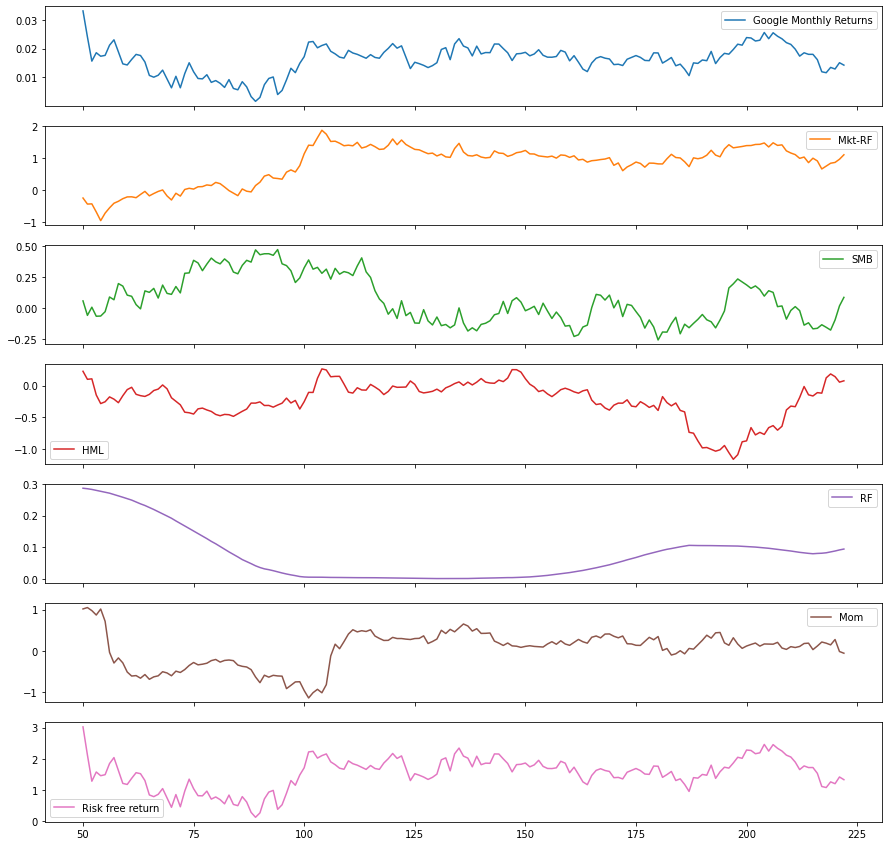

In [105]:
df.rolling(50).mean().plot(subplots=True,figsize = (15,15))

In [97]:
df.corr()

,Google Monthly Returns,Mkt-RF,SMB,HML,RF,Mom,Risk free return
Google Monthly Returns,1.000000,0.530369,0.089499,-0.077093,0.007506,-0.116056,0.999890
Mkt-RF,0.530369,1.000000,0.351072,0.159892,-0.089816,-0.378924,0.531703
SMB,0.089499,0.351072,1.000000,0.056627,-0.059719,-0.189008,0.090386
HML,-0.077093,0.159892,0.056627,1.000000,-0.038173,-0.338942,-0.076527
RF,0.007506,-0.089816,-0.059719,-0.038173,1.000000,0.052562,-0.007340
Mom,-0.116056,-0.378924,-0.189008,-0.338942,0.052562,1.000000,-0.116837
Risk free return,0.999890,0.531703,0.090386,-0.076527,-0.007340,-0.116837,1.000000


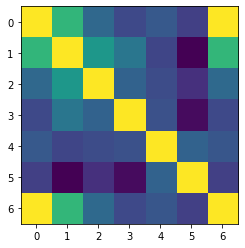

In [98]:
plt.imshow(df.corr())

In [95]:
from statsmodels.api import OLS
results = OLS(df["Risk free return"],df[["SMB","HML","Mom   ","Mkt-RF"]]).fit()

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Risk free return   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.328
Method:                 Least Squares   F-statistic:                              28.03
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                    8.62e-19
Time:                        17:14:37   Log-Likelihood:                         -758.41
No. Observations:                 222   AIC:                                      1525.
Df Residuals:                     218   BIC:                                      1538.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SMB           -0.4018      0.221     -1.815      0.071      -0.838       0.034
HML           -0.4380      0.169     -2.595      0.010      -0.771      -0.105
Mom            0.1028      0.126      0.816      0.415      -0.145       0.351
Mkt-RF         1.2463      0.124     10.068      0.000       1.002       1.490
==============================================================================
Omnibus:                       97.013   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.349
Skew:                           1.651   Prob(JB):                    1.84e-110
Kurtosis:                       9.613   Cond. No.                         2.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above analysis gives us, how our stock returns are exposed over the period of time to multiple factors.

There are 2 factors which are greater than 0.05 here in the P index, the HML and Mkt-RF.


HML explains how is the Value stocks outgrow the Growth Stocks